In [1]:
import os
import sys
from pathlib import Path
sys.path.insert(0, os.path.abspath('.'))
sys.path.insert(0, os.path.abspath('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan\\optan\\src'))
sys.path.insert(0, os.path.abspath('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan\\optan\\src\\optan'))
sys.path.insert(0, os.path.abspath('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan\\optan'))
os.chdir('C:\\Users\\David Palecek\\Documents\\Python_projects\\optan')
from optan.src import optan

init optan
init optan


ModuleNotFoundError: No module named 'optan.src'

In [3]:
exp = optan.Optan()
exp.set_file_format('tiff')
exp.load_folder("C:\\Users\\David Palecek\\Documents\\UAlg\\my_opt\Data\\230202-12-36-33")

missing metadata



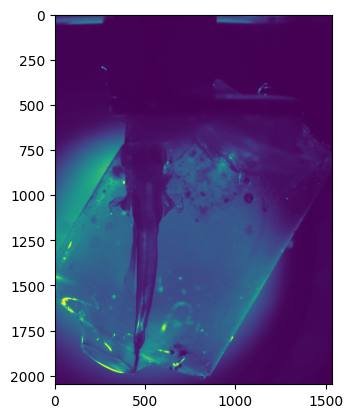

(128, 2048, 1536)


In [4]:
exp.show_image_raw(index=(0, 0, 0))
exp.average_raw_data()
print(exp.data.shape)

In [18]:
# exp.rotate_frames_90('anticlock')
# exp.show_image_data(0)
# print(exp.data.shape)

In [5]:
## cut out edges
exp.data = exp.data[:, 750:, 100:900]

In [6]:
exp.calc_sinogram()

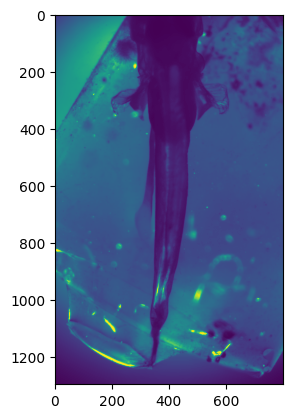

(128, 1298, 800)


In [7]:
exp.show_image_data(0)
print(exp.data.shape)

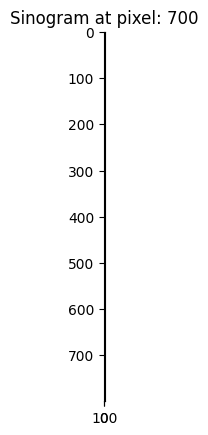

In [12]:
idx = 700
exp.show_image_sino(idx=idx)

In [13]:
np.amax(exp.data[0])

4094.0

In [9]:
from tomopy.recon.rotation import find_center
import tomopy as tom
import numpy as np

In [14]:
theta = np.linspace(
                    0., 360.,
                    128, endpoint=False
                    ) / 360. * (2 * np.pi)
# print(theta)


In [15]:
exp.recon_iradon(idx)

IndexError: index 700 is out of bounds for axis 0 with size 128

In [35]:
center = find_center(exp.data, theta=theta[:], ind=idx)
print(center)

[427.5]


In [38]:
center = tom.find_center_vo(
            exp.data,
            ind=idx,
            smin=-100, smax=100)
print(center)

405.25


In [45]:
r = tom.recon(exp.data[:,idx-5:idx+5,:], theta, center=center, algorithm='mlem')

In [125]:
r.shape

(10, 800, 800)

In [30]:
import matplotlib.pyplot as plt

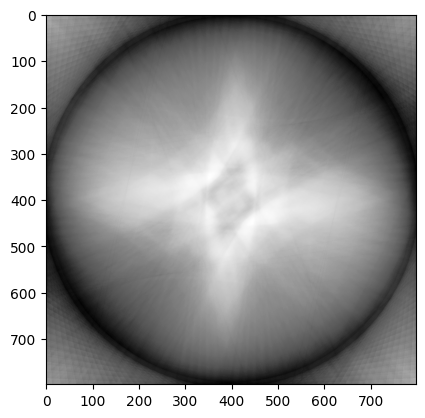

In [46]:
cut = 1
plt.imshow(r[5, cut:-cut, cut:-cut], cmap=plt.cm.Greys)